## 安裝Fuzzy package

In [31]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 建立 Fuzzy Set 及設定數值範圍 

In [32]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import skfuzzy.control as fuzz_ctrl
from mpl_toolkits.mplot3d import Axes3D

# Range
## range of difference of temp. & the room humidity (input)
x_temp_range = np.arange(5,40,1,np.float32)
x_humi_range = np.arange(20,90,1,np.float32)
## range of running time (output) 
y_time_range=np.arange(0,10,1,np.float32)
##　variable and membership functions
x_temp = fuzz_ctrl.Antecedent(x_temp_range,"temp")
x_humi = fuzz_ctrl.Antecedent(x_humi_range,"humi")
y_time = fuzz_ctrl.Consequent(y_time_range,"time")

## Membership functions

In [33]:
x_temp["small"] = fuzz.trapmf(x_temp_range,[5,5,10,15])
x_temp["med"] = fuzz.trimf(x_temp_range,[12,19,26])
x_temp["large"] = fuzz.trimf(x_temp_range,[21,28,33])
x_temp["extra"] = fuzz.trapmf(x_temp_range,[30,35,40,40])

x_humi["dry"] = fuzz.trapmf(x_humi_range,[20,20,30,40])
x_humi["moist"] = fuzz.trapmf(x_humi_range,[33,43,67,77])
x_humi["wet"] = fuzz.trapmf(x_humi_range,[70,80,90,90])

y_time["short"] = fuzz.trapmf(y_time_range,[0,0,3,4])
y_time["medium"] = fuzz.trapmf(y_time_range,[3.3,4,6,6.7])
y_time["long"] = fuzz.trapmf(y_time_range,[6,7,10,10])


## Rules

In [34]:
## 質心模糊
y_time.defuzzify_method = "centroid"
## 輸出規則 
rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["extra"]&x_humi["wet"])|(x_temp["extra"]&x_humi["moist"])|(x_temp["extra"]&x_humi["dry"])|(x_temp["large"]&x_humi["moist"])|(x_temp["large"]&x_humi["wet"])|(x_temp["med"]&x_humi["wet"])),consequent=y_time["long"],label="long")

rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["large"]&x_humi["dry"])|(x_temp["med"]&x_humi["moist"])|(x_temp["med"]&x_humi["dry"])|(x_temp['small']&x_humi['wet'])),consequent = y_time["medium"],label="medium")
rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["small"]&x_humi["dry"])|(x_temp["small"]&x_humi["moist"])),consequent=y_time["short"],label="short")


In [35]:
system=fuzz_ctrl.ControlSystem(rules=[rule_long,rule_med,rule_short])
sys_sim=fuzz_ctrl.ControlSystemSimulation(system)


## 使用者輸入

In [36]:
## 自訂輸入條件
input_temp = "-10"
input_soil = "-10"

while (int(input_temp) < 5 or int(input_temp) > 40):
  input_temp=input("請輸入溫度差(℃)(5-40)")
while (int(input_soil) < 20 or int(input_soil) > 90):
  input_soil=input("請輸入房間濕度(20-90)")
sys_sim.input["temp"]=int(input_temp)
sys_sim.input["humi"]=int(input_soil)


## system compute
sys_sim.compute()
out_y=sys_sim.output["time"]
print("溫度差 ",input_temp,"(℃), 房間濕度", input_soil, ", 時間", out_y)

請輸入溫度差(℃)(5-40)40
請輸入房間濕度(20-90)60
溫度差  40 (℃), 房間濕度 60 , 時間 7.733333333333334


## 可視化

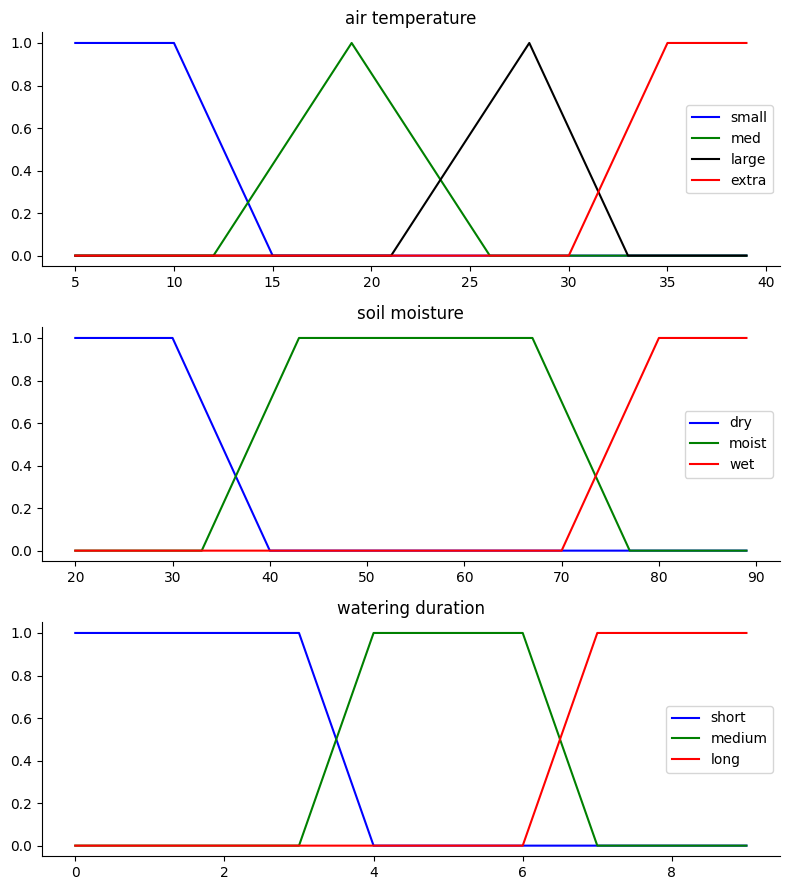

In [37]:

# Visualize these universes and membership functions
fig,(figure1,figure2,figure3)=plt.subplots(nrows=3,figsize=(8,9))
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range,[5,5,10,15]),'b',linewidth=1.5,label='small')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range,[12,19,26]),'g',linewidth=1.5,label='med')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range,[21,28,33]),'black',linewidth=1.5,label='large')
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range,[30,35,40,40]),'r',linewidth=1.5,label='extra')
figure1.set_title('air temperature')
figure1.legend()

figure2.plot(x_humi_range,fuzz.trapmf(x_humi_range,[20,20,30,40]),'b',linewidth=1.5,label='dry')
figure2.plot(x_humi_range,fuzz.trapmf(x_humi_range,[33,43,67,77]),'g',linewidth=1.5,label='moist')
figure2.plot(x_humi_range,fuzz.trapmf(x_humi_range,[70,80,90,90]),'r',linewidth=1.5,label='wet')
figure2.set_title('soil moisture')
figure2.legend()

figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[0,0,3,4]),'b',linewidth=1.5,label='short')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[3.3,4,6,6.7]),'g',linewidth=1.5,label='medium')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[6,7,10,10]),'r',linewidth=1.5,label='long')
figure3.set_title('watering duration')
figure3.legend()

# plot 2d figures
for fi in (figure1,figure2,figure3):
  fi.spines['top'].set_visible(False)
  fi.spines['right'].set_visible(False)
  fi.get_xaxis().tick_bottom()
  fi.get_yaxis().tick_left()

plt.tight_layout()




# 3D figure


In [38]:
from mpl_toolkits.mplot3d import Axes3D# Required for 3D plotting
def funz(x,y):
  sys_sim.input["temp"] = y
  sys_sim.input["humi"] = x 
  sys_sim.compute()
  z=sys_sim.output["time"]
  return z

fig1=plt.figure()#建立一個繪圖物件
ax=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)

X,Y=np.meshgrid(x_humi_range,x_temp_range)
Z=funz(X,Y)
ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap=plt.cm.coolwarm)#用取樣點(x,y,z)去構建曲面
ax.set_xlabel('room humidity',color='r')
ax.set_ylabel('difference of the temperatures',color='g')
ax.set_zlabel('time',color='b')#給三個座標軸註明
plt.show()#顯示模組中的所有繪圖物件


<Figure size 640x480 with 0 Axes>